# HDS5210-2022 final project
## House price survey in St. Louis area
A friend of mine is thinking about buying a real estate in St. Louis recently and asked me if I have any recommendations. I think I can just use what I learned in this course to do some preliminary analysis for him to help him make a correct and reasonable decision. So I revised my original final project plan to explore the housing prices in St. Louis. :-)

### The website I used
All my data come from zillow (https://www.zillow.com/).
I use two ready-made chrome plug-ins to get data.
- chrome.google.com/webstore/detail/export-zillow-data-to-exc/ncdkikkacogkekgnnmmiokebkkcblena
- chrome.google.com/webstore/detail/zillow-to-excel/aecdekdgjlncaadbdiciepplaobhcjgi?hl=en

Because of the limitation of plug-in and the difference of internal logic, the tables I get are also different. Next, I will use what I learned in this class for data analysis.

## Load module

In [39]:
import pandas as pd
import numpy as np

## Import Datasets

### impor from website

In [40]:
URL='https://raw.githubusercontent.com/DamonChen-slu/hds5210-2022/main/Export_Zillow_data_to_Excel.csv'
file1 = pd.read_csv(URL,index_col=0)
file1.shape

(25, 23)

In [41]:
file1.head(5)

,statusType,statusText,timeOnZillow,price,pricePerSqFt,zestimate,zestimatePerSqFt,rentZestimate,area,lotSize,...,address,addressStreet,addressCity,addressState,addressZipcode,latitude,longitude,brokerName,isZillowOwned,detailUrl
zid,,,,,,,,,,,,,,,,,,,,,
2707643,FOR_SALE,Foreclosure,NaN,69900,68,101300.0,98.0,1099.0,1033,6272.640,...,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114,38.691387,-90.330650,RE/MAX Best Choice St. Louis,False,https://www.zillow.com/homedetails/8041-Titus-...
2659560,FOR_SALE,House for sale,NaN,50000,48,53600.0,52.0,874.0,1040,0.253,...,"9801 Diamond Dr, Saint Louis, MO 63137",9801 Diamond Dr,Saint Louis,MO,63137,38.743946,-90.210380,"The Realty Dot, Inc",False,https://www.zillow.com/homedetails/9801-Diamon...
2645780,FOR_SALE,House for sale,NaN,54500,50,NaN,NaN,NaN,1080,8450.640,...,"10043 Diamond Dr, Saint Louis, MO 63137",10043 Diamond Dr,Saint Louis,MO,63137,38.749714,-90.211365,Coldwell Banker Realty - Gunda,False,https://www.zillow.com/homedetails/10043-Diamo...
2634846,FOR_SALE,House for sale,NaN,75000,82,76300.0,84.0,931.0,912,0.259,...,"10439 Coburg Lands Dr, Saint Louis, MO 63137",10439 Coburg Lands Dr,Saint Louis,MO,63137,38.760510,-90.224340,Worth Clark Realty,False,https://www.zillow.com/homedetails/10439-Cobur...
2655299,FOR_SALE,House for sale,NaN,56000,58,NaN,NaN,995.0,960,5357.880,...,"6147 Shillington Ln, Saint Louis, MO 63134",6147 Shillington Ln,Saint Louis,MO,63134,38.748222,-90.321170,"Sandy Bender, Real Estate",False,https://www.zillow.com/homedetails/6147-Shilli...


In [4]:
file1.dtypes

statusType           object
statusText           object
timeOnZillow        float64
price                 int64
pricePerSqFt          int64
zestimate           float64
zestimatePerSqFt    float64
rentZestimate       float64
area                  int64
lotSize             float64
lotAreaUnit          object
beds                  int64
baths                 int64
address              object
addressStreet        object
addressCity          object
addressState         object
addressZipcode        int64
latitude            float64
longitude           float64
brokerName           object
isZillowOwned          bool
detailUrl            object
dtype: object

### import from local

In [5]:
file2 = pd.read_excel("TotalSearchResults.xlsx")
file2.shape

(367, 23)

In [6]:
file2.head(5)

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/1504-E-Swan...,214800.0,200000,1294.0,Not specified,1.0,2.0,864.0,NaN,CONDO,...,MO,USA,Keller Williams Chesterfield,False,1.0,False,False,For Sale (Broker),Condo for sale,FOR_SALE
1,https://www.zillow.com/homedetails/3241-Edgar-...,226100.0,200000,1264.0,Not specified,2.0,2.0,1048.0,NaN,SINGLE_FAMILY,...,MO,USA,Red Key Realty St. Louis,False,1.0,False,False,Coming Soon,Coming soon,FOR_SALE
2,https://www.zillow.com/homedetails/717-Zeiss-A...,NaN,200000,NaN,Not specified,2.0,3.0,1582.0,NaN,SINGLE_FAMILY,...,MO,USA,Realty Executives of St. Louis,False,1.0,False,False,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/5775-Birch-...,NaN,200000,2027.0,Not specified,4.0,3.0,1330.0,NaN,SINGLE_FAMILY,...,MO,USA,L.K. Wood Realty Services Inc,False,1.0,False,False,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/4132-92nd-A...,NaN,199900,NaN,Not specified,2.0,2.0,1197.0,NaN,SINGLE_FAMILY,...,MO,USA,Keller Williams Realty West,False,1.0,False,False,For Sale (Broker),House for sale,FOR_SALE


In [7]:
file2.dtypes

Url                object
Zestimate         float64
Price               int64
Rent Zestimate    float64
Days On Zillow     object
Bathrooms         float64
Bedrooms          float64
Living Area       float64
Lot Size          float64
Home Type          object
Street Address     object
City               object
Zip                 int64
State              object
Country            object
Broker Name        object
Has 3D Model         bool
Has Image         float64
Has Video            bool
isZillowOwned        bool
sgapt              object
statusText         object
statusType         object
dtype: object

# Data analysis(Data Aggregation& Pivoting and Transformation)

### remove the NA colmns

In [8]:
# Drop NA value
file1.dropna(axis=1,how="all").head(5)

,statusType,statusText,price,pricePerSqFt,zestimate,zestimatePerSqFt,rentZestimate,area,lotSize,lotAreaUnit,...,address,addressStreet,addressCity,addressState,addressZipcode,latitude,longitude,brokerName,isZillowOwned,detailUrl
zid,,,,,,,,,,,,,,,,,,,,,
2707643,FOR_SALE,Foreclosure,69900,68,101300.0,98.0,1099.0,1033,6272.640,sqft,...,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114,38.691387,-90.330650,RE/MAX Best Choice St. Louis,False,https://www.zillow.com/homedetails/8041-Titus-...
2659560,FOR_SALE,House for sale,50000,48,53600.0,52.0,874.0,1040,0.253,acres,...,"9801 Diamond Dr, Saint Louis, MO 63137",9801 Diamond Dr,Saint Louis,MO,63137,38.743946,-90.210380,"The Realty Dot, Inc",False,https://www.zillow.com/homedetails/9801-Diamon...
2645780,FOR_SALE,House for sale,54500,50,NaN,NaN,NaN,1080,8450.640,sqft,...,"10043 Diamond Dr, Saint Louis, MO 63137",10043 Diamond Dr,Saint Louis,MO,63137,38.749714,-90.211365,Coldwell Banker Realty - Gunda,False,https://www.zillow.com/homedetails/10043-Diamo...
2634846,FOR_SALE,House for sale,75000,82,76300.0,84.0,931.0,912,0.259,acres,...,"10439 Coburg Lands Dr, Saint Louis, MO 63137",10439 Coburg Lands Dr,Saint Louis,MO,63137,38.760510,-90.224340,Worth Clark Realty,False,https://www.zillow.com/homedetails/10439-Cobur...
2655299,FOR_SALE,House for sale,56000,58,NaN,NaN,995.0,960,5357.880,sqft,...,"6147 Shillington Ln, Saint Louis, MO 63134",6147 Shillington Ln,Saint Louis,MO,63134,38.748222,-90.321170,"Sandy Bender, Real Estate",False,https://www.zillow.com/homedetails/6147-Shilli...


In [42]:
file1 = file1.drop(['statusType','statusText','isZillowOwned','detailUrl'], axis=1)
file1.head()

,timeOnZillow,price,pricePerSqFt,zestimate,zestimatePerSqFt,rentZestimate,area,lotSize,lotAreaUnit,beds,baths,address,addressStreet,addressCity,addressState,addressZipcode,latitude,longitude,brokerName
zid,,,,,,,,,,,,,,,,,,,
2707643,NaN,69900,68,101300.0,98.0,1099.0,1033,6272.640,sqft,3,1,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114,38.691387,-90.330650,RE/MAX Best Choice St. Louis
2659560,NaN,50000,48,53600.0,52.0,874.0,1040,0.253,acres,2,1,"9801 Diamond Dr, Saint Louis, MO 63137",9801 Diamond Dr,Saint Louis,MO,63137,38.743946,-90.210380,"The Realty Dot, Inc"
2645780,NaN,54500,50,NaN,NaN,NaN,1080,8450.640,sqft,2,1,"10043 Diamond Dr, Saint Louis, MO 63137",10043 Diamond Dr,Saint Louis,MO,63137,38.749714,-90.211365,Coldwell Banker Realty - Gunda
2634846,NaN,75000,82,76300.0,84.0,931.0,912,0.259,acres,3,2,"10439 Coburg Lands Dr, Saint Louis, MO 63137",10439 Coburg Lands Dr,Saint Louis,MO,63137,38.760510,-90.224340,Worth Clark Realty
2655299,NaN,56000,58,NaN,NaN,995.0,960,5357.880,sqft,3,1,"6147 Shillington Ln, Saint Louis, MO 63134",6147 Shillington Ln,Saint Louis,MO,63134,38.748222,-90.321170,"Sandy Bender, Real Estate"


## Find out the highest and lowest prices in the two files and their location (zip code).

In [22]:
file1["price"].agg(['min','max','mean','median','std','count'])

min        50000.000000
max       200000.000000
mean      123471.960000
median    130000.000000
std        50485.743592
count         25.000000
Name: price, dtype: float64

**The higest price of file1 is \$*200,000* in the 63143 , lowest price is \$*50,000* in 63031**

In [24]:
file2["Price"].agg(['min','max','mean','median','std','count'])

min        50000.000000
max       498900.000000
mean      126194.994550
median    114900.000000
std        59852.937557
count        367.000000
Name: Price, dtype: float64

**The higest price of file2 is \$*498,900* in the 63143 , lowest price is \$*50,000* in 63031**

## From file1, the relationship of price per Sqft and the area

In [9]:
file1_price_area = file1[['pricePerSqFt','area']]
file1_price_area.head(5)

,pricePerSqFt,area
zid,,
2707643,68,1033
2659560,48,1040
2645780,50,1080
2634846,82,912
2655299,58,960


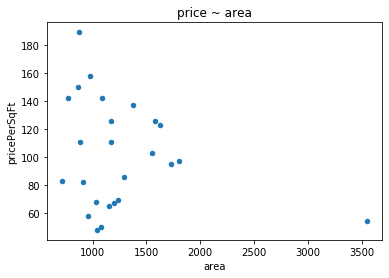

In [10]:
file1_price_area.plot(kind='scatter',x='area',y='pricePerSqFt', title="price ~ area")

In [18]:
file2_sort = file2.sort_values(by='Price', ascending=False)
file2_sort.head(5)

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
51,https://www.zillow.com/homedetails/1-Hermitage...,NaN,498900,NaN,Not specified,3.0,4.0,2539.0,NaN,SINGLE_FAMILY,...,MO,USA,STL New Home Realty,False,1.0,False,False,New Construction,New construction,FOR_SALE
43,https://www.zillow.com/homedetails/17495-Wyman...,NaN,464399,NaN,Not specified,2.0,3.0,1989.0,NaN,SINGLE_FAMILY,...,MO,USA,STL New Home Realty,False,1.0,False,False,New Construction,New construction,FOR_SALE
47,https://www.zillow.com/homedetails/17082-Manch...,NaN,425000,1200.0,Not specified,NaN,NaN,NaN,NaN,CONDO,...,MO,USA,Ed Holthaus Realty LLC,False,1.0,False,False,For Sale (Broker),Condo for sale,FOR_SALE
49,https://www.zillow.com/homedetails/1-Chesapeak...,NaN,374900,NaN,Not specified,3.0,4.0,1965.0,NaN,SINGLE_FAMILY,...,MO,USA,Premier Real Estate Group,False,1.0,False,False,New Construction,New construction,FOR_SALE
40,https://www.zillow.com/homedetails/7951-Monroe...,NaN,349900,850.0,Not specified,1.0,2.0,792.0,NaN,SINGLE_FAMILY,...,MO,USA,Joni Realty Co.,False,1.0,False,False,For Sale (Broker),House for sale,FOR_SALE


In [19]:
file2_sort_price_zip = file2_sort[['Price','Zip']]
file2_sort_price_zip.max()

Price    498900
Zip       63146
dtype: int64

In [20]:
file2_sort_price_zip.min()

Price    50000
Zip      63005
dtype: int64

**The higest price of file2 is \$*498,900* in the 63143 , lowest price is \$*50,000* in 63031**

In [21]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add .
    !git commit -a -m "Submitting the final programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
